In [1]:
import pyarrow.parquet as pq
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
# Config
MAX_COUNT_RATING = 100
TEST_SIZE = 0.2
VALIDATION_SIZE = 0.2
RANDOM_STATE = 42

In [3]:
# Read the parquet file
df = pq.read_table('./data/annually_rating.parquet').to_pandas()

In [4]:
# Show the first 10 rows
df.head(10)

,Vintage,WineID,RegionID,Year,AverageRating,MinRating,MaxRating,CountRating
0,1988,100001,1001,2015,3.000000,3.0,3.0,1
1,1988,100001,1001,2017,5.000000,5.0,5.0,1
2,1999,100001,1001,2017,4.500000,4.0,5.0,2
3,2007,100001,1001,2020,2.500000,2.5,2.5,1
4,2008,100001,1001,2012,4.000000,4.0,4.0,1
5,2008,100001,1001,2014,3.416667,2.0,4.0,6
6,2008,100001,1001,2015,3.687500,1.5,5.0,16
7,2008,100001,1001,2016,3.617647,1.0,5.0,17
8,2008,100001,1001,2018,3.500000,3.5,3.5,1
9,2008,100001,1001,2020,4.000000,4.0,4.0,1


In [5]:
# Show the schema
df.dtypes

Vintage           object
WineID             int64
RegionID           int32
Year               int32
AverageRating    float64
MinRating        float64
MaxRating        float64
CountRating        int64
dtype: object

In [6]:
# Number of rows where CountRating >= MAX_COUNT_RATING
len(df[df['CountRating'] >= MAX_COUNT_RATING])

22384

In [7]:
# Filter the dataframe
rating_df = df[df['CountRating'] >= MAX_COUNT_RATING]

In [ ]:
# Cast Vintage to int
rating_df['Vintage'] = rating_df['Vintage'].astype(int)

In [ ]:
# Add column 'DeltaTimeRating' to the dataframe
rating_df['DeltaTimeRating'] = rating_df['Year'] - rating_df['Vintage']

In [10]:
# Number of rows where DeltaTimeRating < 0
len(rating_df[rating_df['DeltaTimeRating'] < 0])

0

In [11]:
rating_df.head(10)

,Vintage,WineID,RegionID,Year,AverageRating,MinRating,MaxRating,CountRating,DeltaTimeRating
37,2017,100001,1001,2019,4.272727,1.0,5.0,165,2
171,2015,100006,1001,2017,3.478632,1.0,5.0,117,2
183,2017,100006,1001,2019,3.580000,2.5,5.0,100,2
187,2018,100006,1001,2020,3.800613,1.0,5.0,163,2
188,2018,100006,1001,2021,3.773723,1.0,5.0,137,3
190,2019,100006,1001,2021,3.509346,1.0,5.0,107,2
327,2017,100009,1004,2019,3.269231,1.0,5.0,169,2
331,2018,100009,1004,2020,3.433884,1.0,5.0,242,2
333,2019,100009,1004,2020,3.346154,2.0,5.0,104,1
334,2019,100009,1004,2021,3.397959,1.0,5.0,147,2


In [12]:
# Shape of the dataframe
rating_df.shape

(22384, 9)

In [13]:
weather_df = pq.read_table('./data/agg_monthly.parquet').to_pandas()
weather_df.shape

(1912752, 17)

In [14]:
# Print the first 10 rows
weather_df.head(10)

,RegionID,year,month,avg_temperature,max_temperature,min_temperature,avg_sunshine_duration,max_sunshine_duration,min_sunshine_duration,avg_precipitation,avg_rain,avg_snowfall,count_record,avg_humidity,avg_wind_speed,avg_soil_temperature,avg_soil_moisture
0,1000,1949,1,20.893548,22.9,17.4,36360.254516,46592.96,114.22,5.119355,5.119355,0.0,31,83.374497,8.215034,19.860537,0.455046
1,1000,1949,2,20.239286,23.5,15.0,39061.164286,45490.35,5610.33,2.839286,2.839286,0.0,28,80.038690,7.975744,19.858333,0.418362
2,1000,1949,3,20.719355,22.7,18.6,30877.352581,40876.61,0.00,5.893548,5.893548,0.0,31,85.978495,7.284409,20.569624,0.444293
3,1000,1949,4,15.953333,19.4,12.8,33343.093333,39559.54,0.00,2.126667,2.126667,0.0,30,82.226389,7.459028,17.799167,0.467942
4,1000,1949,5,13.887097,21.9,7.0,23280.035161,36306.69,0.00,5.925806,5.925806,0.0,31,85.336022,8.177823,15.398253,0.465198
5,1000,1949,6,15.126667,17.8,11.1,23274.051000,33531.70,0.00,1.606667,1.606667,0.0,30,85.050000,8.322222,15.577083,0.489501
6,1000,1949,7,12.309677,18.6,5.3,24589.808710,35126.91,0.00,3.477419,3.477419,0.0,31,83.344086,8.618817,13.716263,0.484792
7,1000,1949,8,12.693548,17.1,5.6,24244.251613,38593.41,0.00,4.425806,4.425806,0.0,31,84.318548,8.879301,13.183468,0.480704
8,1000,1949,9,14.150000,20.4,7.6,27633.479000,40515.45,0.00,2.700000,2.700000,0.0,30,80.055556,9.205278,13.616944,0.445733
9,1000,1949,10,14.541935,18.3,11.0,24344.522903,43788.30,0.00,6.670968,6.670968,0.0,31,83.653226,9.564919,14.525134,0.485536


In [15]:
# Join the two dataframes rating_df.RegionID == weather_df.RegionID & rating_df.Vintage == weather_df.year
merge_df = rating_df.merge(weather_df, left_on=['RegionID', 'Vintage'], right_on=['RegionID', 'year'])

In [16]:
# Shape of the dataframe
merge_df.shape

(268596, 25)

In [17]:
# Drop unnecessary columns
merge_df.drop(['count_record', 'year', 'min_sunshine_duration', 'max_sunshine_duration', 'max_temperature', 'min_temperature'], axis=1, inplace=True)

In [18]:
merge_df.head(10)

,Vintage,WineID,RegionID,Year,AverageRating,MinRating,MaxRating,CountRating,DeltaTimeRating,month,avg_temperature,avg_sunshine_duration,avg_precipitation,avg_rain,avg_snowfall,avg_humidity,avg_wind_speed,avg_soil_temperature,avg_soil_moisture
0,2017,100001,1001,2019,4.272727,1.0,5.0,165,2,1,26.670968,36388.056129,4.987097,4.987097,0.0,78.767473,5.151075,27.142608,0.471441
1,2017,100001,1001,2019,4.272727,1.0,5.0,165,2,2,25.617857,32068.925000,7.482143,7.482143,0.0,85.313988,4.650298,26.469643,0.495249
2,2017,100001,1001,2019,4.272727,1.0,5.0,165,2,3,26.448387,38024.009677,4.154839,4.154839,0.0,82.702957,4.258333,26.694489,0.484233
3,2017,100001,1001,2019,4.272727,1.0,5.0,165,2,4,26.430000,36712.819000,2.056667,2.056667,0.0,78.326389,5.115694,26.643611,0.470664
4,2017,100001,1001,2019,4.272727,1.0,5.0,165,2,5,26.283871,37847.009677,0.180645,0.180645,0.0,70.458333,5.398253,26.299866,0.431762
5,2017,100001,1001,2019,4.272727,1.0,5.0,165,2,6,25.213333,36917.356000,0.003333,0.003333,0.0,57.540278,6.759583,25.696389,0.416094
6,2017,100001,1001,2019,4.272727,1.0,5.0,165,2,7,23.761290,38055.504194,0.000000,0.000000,0.0,48.439516,8.242608,24.558199,0.404673
7,2017,100001,1001,2019,4.272727,1.0,5.0,165,2,8,27.364516,38346.088710,0.000000,0.000000,0.0,43.908602,6.781317,25.634274,0.402241
8,2017,100001,1001,2019,4.272727,1.0,5.0,165,2,9,29.013333,38422.171000,0.020000,0.020000,0.0,36.404167,8.159028,27.234167,0.382358
9,2017,100001,1001,2019,4.272727,1.0,5.0,165,2,10,28.951613,37825.997742,1.674194,1.674194,0.0,55.732527,7.054570,28.027823,0.365884


In [19]:
# Print the schema
merge_df.dtypes

Vintage                    int32
WineID                     int64
RegionID                   int32
Year                       int32
AverageRating            float64
MinRating                float64
MaxRating                float64
CountRating                int64
DeltaTimeRating            int32
month                      int32
avg_temperature          float64
avg_sunshine_duration    float64
avg_precipitation        float64
avg_rain                 float64
avg_snowfall             float64
avg_humidity             float64
avg_wind_speed           float64
avg_soil_temperature     float64
avg_soil_moisture        float64
dtype: object

## Test weather with RegionID == 1001

In [20]:
# Get weather data for RegionID == 1001
weather_1001 = merge_df[merge_df['RegionID'] == 1001]
weather_1001.shape

(1284, 19)

In [ ]:
# Drop unnecessary columns
weather_1001.drop(['WineID', 'RegionID', 'Year', 'AverageRating', 'MinRating', 'MaxRating', 'CountRating', 'DeltaTimeRating'], axis=1, inplace=True)

In [ ]:
# Drop duplicates
weather_1001.drop_duplicates(inplace=True)

In [23]:
weather_1001.shape

(144, 11)

In [24]:
# Show weather_1001 and order by Vintage
weather_1001.sort_values(by=['Vintage', 'month'], inplace=True)

C:\Users\PQV\AppData\Local\Temp\ipykernel_11068\583815585.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_1001.sort_values(by=['Vintage', 'month'], inplace=True)


In [25]:
# Add timestamp column
weather_1001['timestamp'] = pd.to_datetime(weather_1001['Vintage'].astype(str) + '-' + weather_1001['month'].astype(str) + '-01')

C:\Users\PQV\AppData\Local\Temp\ipykernel_11068\3358474081.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_1001['timestamp'] = pd.to_datetime(weather_1001['Vintage'].astype(str) + '-' + weather_1001['month'].astype(str) + '-01')


In [26]:
# Show the first 10 rows
weather_1001.head(10)

,Vintage,month,avg_temperature,avg_sunshine_duration,avg_precipitation,avg_rain,avg_snowfall,avg_humidity,avg_wind_speed,avg_soil_temperature,avg_soil_moisture,timestamp
4464,2009,1,26.435484,35032.635161,7.287097,7.287097,0.0,80.228495,5.189919,27.160349,0.493448,2009-01-01
4465,2009,2,26.239286,33484.181071,5.885714,5.885714,0.0,82.620536,4.716071,26.938244,0.495412,2009-02-01
4466,2009,3,26.574194,32427.138387,6.822581,6.822581,0.0,81.641129,4.414651,27.200941,0.476897,2009-03-01
4467,2009,4,25.493333,33239.103000,4.920000,4.920000,0.0,82.186111,4.703472,26.272361,0.482983,2009-04-01
4468,2009,5,25.887097,36186.539677,0.435484,0.435484,0.0,72.545699,5.386694,26.261022,0.413558,2009-05-01
4469,2009,6,25.646667,37126.314667,0.016667,0.016667,0.0,58.468056,6.514167,26.149444,0.380131,2009-06-01
4470,2009,7,26.861290,37715.103871,0.000000,0.000000,0.0,47.622312,6.555108,26.506452,0.360578,2009-07-01
4471,2009,8,27.854839,37132.755484,0.374194,0.374194,0.0,45.076613,7.683333,27.475538,0.345965,2009-08-01
4472,2009,9,28.300000,37997.389333,2.676667,2.676667,0.0,63.463889,6.010000,28.075694,0.336443,2009-09-01
4473,2009,10,27.803226,35240.480323,4.493548,4.493548,0.0,71.774194,5.338575,28.520833,0.336151,2009-10-01


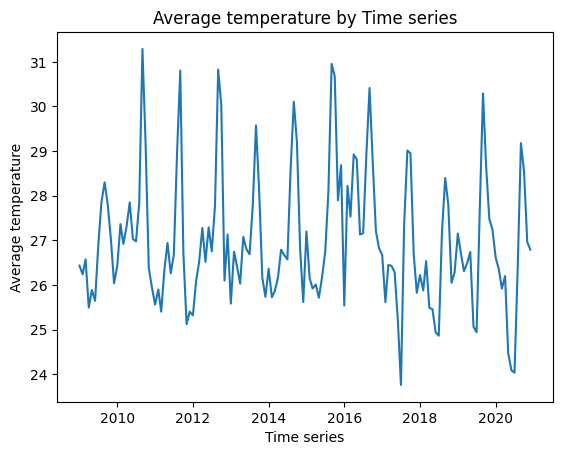

In [27]:
# Line chart for avg_temperature by Time series
plt.plot(weather_1001['timestamp'], weather_1001['avg_temperature'])
plt.xlabel('Time series')
plt.ylabel('Average temperature')
plt.title('Average temperature by Time series')
plt.show()

## Feature Engineering

In [28]:
# Apply autoscaling for column of merge_df
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

Features need to be scaled to the same range.  The following features are scaled to the range of 0 to 1.
- DeltaTimeRating            int32
- avg_temperature          float64
- avg_sunshine_duration    float64
- avg_precipitation        float64
- avg_rain                 float64
- avg_snowfall             float64
- avg_humidity             float64
- avg_wind_speed           float64
- avg_soil_temperature     float64
- avg_soil_moisture        float64

and drop the following features:
- Vintage
- WineID
- RegionID
- Year
- month
- MinRating
- MaxRating
- CountRating

In [29]:
merge_df['DeltaTimeRating'] = scaler.fit_transform(merge_df['DeltaTimeRating'].values.reshape(-1, 1))
merge_df['avg_temperature'] = scaler.fit_transform(merge_df['avg_temperature'].values.reshape(-1, 1))
merge_df['avg_sunshine_duration'] = scaler.fit_transform(merge_df['avg_sunshine_duration'].values.reshape(-1, 1))
merge_df['avg_precipitation'] = scaler.fit_transform(merge_df['avg_precipitation'].values.reshape(-1, 1))
merge_df['avg_rain'] = scaler.fit_transform(merge_df['avg_rain'].values.reshape(-1, 1))
merge_df['avg_snowfall'] = scaler.fit_transform(merge_df['avg_snowfall'].values.reshape(-1, 1))
merge_df['avg_humidity'] = scaler.fit_transform(merge_df['avg_humidity'].values.reshape(-1, 1))
merge_df['avg_wind_speed'] = scaler.fit_transform(merge_df['avg_wind_speed'].values.reshape(-1, 1))
merge_df['avg_soil_temperature'] = scaler.fit_transform(merge_df['avg_soil_temperature'].values.reshape(-1, 1))
merge_df['avg_soil_moisture'] = scaler.fit_transform(merge_df['avg_soil_moisture'].values.reshape(-1, 1))

In [30]:
merge_df.sort_values(by=['WineID', 'Vintage', 'Year', 'month'], inplace=True)

In [31]:
# Show the first 10 rows
merge_df.head(10)

,Vintage,WineID,RegionID,Year,AverageRating,MinRating,MaxRating,CountRating,DeltaTimeRating,month,avg_temperature,avg_sunshine_duration,avg_precipitation,avg_rain,avg_snowfall,avg_humidity,avg_wind_speed,avg_soil_temperature,avg_soil_moisture
0,2017,100001,1001,2019,4.272727,1.0,5.0,165,0.035088,1,0.842552,0.673458,0.217404,0.218801,0.0,0.795811,0.085199,0.812267,0.684211
1,2017,100001,1001,2019,4.272727,1.0,5.0,165,0.035088,2,0.821868,0.578175,0.326172,0.328267,0.0,0.878750,0.070463,0.796689,0.718764
2,2017,100001,1001,2019,4.272727,1.0,5.0,165,0.035088,3,0.838180,0.709549,0.181123,0.182287,0.0,0.845670,0.058928,0.801894,0.702776
3,2017,100001,1001,2019,4.272727,1.0,5.0,165,0.035088,4,0.837819,0.680623,0.089657,0.090233,0.0,0.790223,0.084158,0.800716,0.683084
4,2017,100001,1001,2019,4.272727,1.0,5.0,165,0.035088,5,0.834949,0.705644,0.007875,0.007926,0.0,0.690541,0.092473,0.792758,0.626625
5,2017,100001,1001,2019,4.272727,1.0,5.0,165,0.035088,6,0.813922,0.685135,0.000145,0.000146,0.0,0.526879,0.132534,0.778788,0.603886
6,2017,100001,1001,2019,4.272727,1.0,5.0,165,0.035088,7,0.785402,0.710243,0.000000,0.000000,0.0,0.411579,0.176175,0.752440,0.587310
7,2017,100001,1001,2019,4.272727,1.0,5.0,165,0.035088,8,0.856174,0.716654,0.000000,0.000000,0.0,0.354176,0.133173,0.777350,0.583780
8,2017,100001,1001,2019,4.272727,1.0,5.0,165,0.035088,9,0.888559,0.718332,0.000872,0.000877,0.0,0.259101,0.173716,0.814387,0.554924
9,2017,100001,1001,2019,4.272727,1.0,5.0,165,0.035088,10,0.887347,0.705180,0.072984,0.073453,0.0,0.503976,0.141214,0.832759,0.531015


In [32]:
new_merge_df = pd.DataFrame()

In [33]:
list_vintage = merge_df['Vintage'].tolist()
new_merge_df['Vintage'] = list_vintage[0::12]

list_wine_id = merge_df['WineID'].tolist()
new_merge_df['WineID'] = list_wine_id[0::12]

list_region_id = merge_df['RegionID'].tolist()
new_merge_df['RegionID'] = list_region_id[0::12]

list_year = merge_df['Year'].tolist()
new_merge_df['Year'] = list_year[0::12]

list_average_rating = merge_df['AverageRating'].tolist()
new_merge_df['AverageRating'] = list_average_rating[0::12]

list_delta_time_rating = merge_df['DeltaTimeRating'].tolist()
new_merge_df['DeltaTimeRating'] = list_delta_time_rating[0::12]

In [34]:
# month: list of 12 values from index to index + 12
list_month = merge_df['month'].tolist()
list_month = [list_month[i:i + 12] for i in range(0, len(list_month), 12)]
new_merge_df['month'] = list_month

# avg_temperature: list of 12 values from index to index + 12
list_avg_temperature = merge_df['avg_temperature'].tolist()
list_avg_temperature = [list_avg_temperature[i:i + 12] for i in range(0, len(list_avg_temperature), 12)]
new_merge_df['avg_temperature'] = list_avg_temperature

# avg_sunshine_duration: list of 12 values from index to index + 12
list_avg_sunshine_duration = merge_df['avg_sunshine_duration'].tolist()
list_avg_sunshine_duration = [list_avg_sunshine_duration[i:i + 12] for i in range(0, len(list_avg_sunshine_duration), 12)]
new_merge_df['avg_sunshine_duration'] = list_avg_sunshine_duration
                            
# avg_precipitation: list of 12 values from index to index + 12
list_avg_precipitation = merge_df['avg_precipitation'].tolist()
list_avg_precipitation = [list_avg_precipitation[i:i + 12] for i in range(0, len(list_avg_precipitation), 12)]
new_merge_df['avg_precipitation'] = list_avg_precipitation

# avg_rain: list of 12 values from index to index + 12
list_avg_rain = merge_df['avg_rain'].tolist()
list_avg_rain = [list_avg_rain[i:i + 12] for i in range(0, len(list_avg_rain), 12)]
new_merge_df['avg_rain'] = list_avg_rain

# avg_snowfall: list of 12 values from index to index + 12
list_avg_snowfall = merge_df['avg_snowfall'].tolist()
list_avg_snowfall = [list_avg_snowfall[i:i + 12] for i in range(0, len(list_avg_snowfall), 12)]
new_merge_df['avg_snowfall'] = list_avg_snowfall

# avg_humidity: list of 12 values from index to index + 12
list_avg_humidity = merge_df['avg_humidity'].tolist()
list_avg_humidity = [list_avg_humidity[i:i + 12] for i in range(0, len(list_avg_humidity), 12)]
new_merge_df['avg_humidity'] = list_avg_humidity

# avg_wind_speed: list of 12 values from index to index + 12
list_avg_wind_speed = merge_df['avg_wind_speed'].tolist()
list_avg_wind_speed = [list_avg_wind_speed[i:i + 12] for i in range(0, len(list_avg_wind_speed), 12)]
new_merge_df['avg_wind_speed'] = list_avg_wind_speed

# avg_soil_temperature: list of 12 values from index to index + 12
list_avg_soil_temperature = merge_df['avg_soil_temperature'].tolist()
list_avg_soil_temperature = [list_avg_soil_temperature[i:i + 12] for i in range(0, len(list_avg_soil_temperature), 12)]
new_merge_df['avg_soil_temperature'] = list_avg_soil_temperature

# avg_soil_moisture: list of 12 values from index to index + 12
list_avg_soil_moisture = merge_df['avg_soil_moisture'].tolist()
list_avg_soil_moisture = [list_avg_soil_moisture[i:i + 12] for i in range(0, len(list_avg_soil_moisture), 12)]
new_merge_df['avg_soil_moisture'] = list_avg_soil_moisture

In [35]:
# Show first 10 rows of new_merge_df
new_merge_df.head(10)

,Vintage,WineID,RegionID,Year,AverageRating,DeltaTimeRating,month,avg_temperature,avg_sunshine_duration,avg_precipitation,avg_rain,avg_snowfall,avg_humidity,avg_wind_speed,avg_soil_temperature,avg_soil_moisture
0,2017,100001,1001,2019,4.272727,0.035088,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]","[0.8425521130330104, 0.8218675609380799, 0.838...","[0.6734582663220409, 0.5781750151785042, 0.709...","[0.21740418757188135, 0.32617157091701704, 0.1...","[0.21880086129335535, 0.3282670009401442, 0.18...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.7958109833971903, 0.8787502280605729, 0.845...","[0.08519936961681214, 0.07046279801785636, 0.0...","[0.8122671616549405, 0.7966885435394488, 0.801...","[0.6842111973265387, 0.7187637006049298, 0.702..."
1,2015,100006,1001,2017,3.478632,0.035088,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]","[0.8529430399797251, 0.8323897321711426, 0.827...","[0.755637915196389, 0.5606540562201561, 0.5836...","[0.1494829569139132, 0.29627899735326174, 0.27...","[0.1504432830238271, 0.2981823879661548, 0.274...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.7711707109408259, 0.833427598370127, 0.8517...","[0.0780679775748488, 0.09643508373664599, 0.06...","[0.8258548921152458, 0.816355059856087, 0.8020...","[0.6677219477969564, 0.6855086204476204, 0.717..."
2,2017,100006,1001,2019,3.580000,0.035088,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]","[0.8425521130330104, 0.8218675609380799, 0.838...","[0.6734582663220409, 0.5781750151785042, 0.709...","[0.21740418757188135, 0.32617157091701704, 0.1...","[0.21880086129335535, 0.3282670009401442, 0.18...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.7958109833971903, 0.8787502280605729, 0.845...","[0.08519936961681214, 0.07046279801785636, 0.0...","[0.8122671616549405, 0.7966885435394488, 0.801...","[0.6842111973265387, 0.7187637006049298, 0.702..."
3,2018,100006,1001,2020,3.800613,0.035088,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]","[0.8337451688525629, 0.8269883509381705, 0.839...","[0.619721813718897, 0.5726836150994736, 0.6643...","[0.19363878802489043, 0.3484353106025221, 0.21...","[0.19488278525287858, 0.35067376997806315, 0.2...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.8121072796934864, 0.8567676214802652, 0.836...","[0.08302395884416637, 0.08239577366845528, 0.0...","[0.800291165652724, 0.7948352267101638, 0.8020...","[0.6898604185069132, 0.7176946484762262, 0.697..."
4,2018,100006,1001,2021,3.773723,0.052632,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]","[0.8337451688525629, 0.8269883509381705, 0.839...","[0.619721813718897, 0.5726836150994736, 0.6643...","[0.19363878802489043, 0.3484353106025221, 0.21...","[0.19488278525287858, 0.35067376997806315, 0.2...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.8121072796934864, 0.8567676214802652, 0.836...","[0.08302395884416637, 0.08239577366845528, 0.0...","[0.800291165652724, 0.7948352267101638, 0.8020...","[0.6898604185069132, 0.7176946484762262, 0.697..."
5,2019,100006,1001,2021,3.509346,0.035088,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]","[0.8520560096306153, 0.8429820512124256, 0.835...","[0.6992997392875369, 0.6478904365677511, 0.657...","[0.09913968450076087, 0.2178109917484042, 0.27...","[0.0997765893996219, 0.2192102789094328, 0.275...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.7433120476798638, 0.8144426199598614, 0.864...","[0.0861288633105786, 0.07876552162649318, 0.07...","[0.8114332913175571, 0.8126346468902472, 0.802...","[0.6450626407419842, 0.6512967926276474, 0.709..."
6,2017,100009,1004,2019,3.269231,0.035088,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]","[0.7575872774504215, 0.7677836008001375, 0.729...","[0.5022648414944, 0.7558886569142231, 0.601755...","[0.5437917162616205, 0.15771446364627126, 0.19...","[0.5472852073877136, 0.15872767157630838, 0.19...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.8681140911025967, 0.7896132092683816, 0.873...","[0.17555011194324788, 0.17948421519118152, 0.2...","[0.7269323561582033, 0.73507

In [36]:
# Drop unnecessary columns
model_data = new_merge_df.drop(['Vintage', 'WineID', 'RegionID', 'Year','month'], axis=1)

In [37]:
# Show the first 20 rows
model_data.head(20)

,AverageRating,DeltaTimeRating,avg_temperature,avg_sunshine_duration,avg_precipitation,avg_rain,avg_snowfall,avg_humidity,avg_wind_speed,avg_soil_temperature,avg_soil_moisture
0,4.272727,0.035088,"[0.8425521130330104, 0.8218675609380799, 0.838...","[0.6734582663220409, 0.5781750151785042, 0.709...","[0.21740418757188135, 0.32617157091701704, 0.1...","[0.21880086129335535, 0.3282670009401442, 0.18...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.7958109833971903, 0.8787502280605729, 0.845...","[0.08519936961681214, 0.07046279801785636, 0.0...","[0.8122671616549405, 0.7966885435394488, 0.801...","[0.6842111973265387, 0.7187637006049298, 0.702..."
1,3.478632,0.035088,"[0.8529430399797251, 0.8323897321711426, 0.827...","[0.755637915196389, 0.5606540562201561, 0.5836...","[0.1494829569139132, 0.29627899735326174, 0.27...","[0.1504432830238271, 0.2981823879661548, 0.274...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.7711707109408259, 0.833427598370127, 0.8517...","[0.0780679775748488, 0.09643508373664599, 0.06...","[0.8258548921152458, 0.816355059856087, 0.8020...","[0.6677219477969564, 0.6855086204476204, 0.717..."
2,3.580000,0.035088,"[0.8425521130330104, 0.8218675609380799, 0.838...","[0.6734582663220409, 0.5781750151785042, 0.709...","[0.21740418757188135, 0.32617157091701704, 0.1...","[0.21880086129335535, 0.3282670009401442, 0.18...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.7958109833971903, 0.8787502280605729, 0.845...","[0.08519936961681214, 0.07046279801785636, 0.0...","[0.8122671616549405, 0.7966885435394488, 0.801...","[0.6842111973265387, 0.7187637006049298, 0.702..."
3,3.800613,0.035088,"[0.8337451688525629, 0.8269883509381705, 0.839...","[0.619721813718897, 0.5726836150994736, 0.6643...","[0.19363878802489043, 0.3484353106025221, 0.21...","[0.19488278525287858, 0.35067376997806315, 0.2...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.8121072796934864, 0.8567676214802652, 0.836...","[0.08302395884416637, 0.08239577366845528, 0.0...","[0.800291165652724, 0.7948352267101638, 0.8020...","[0.6898604185069132, 0.7176946484762262, 0.697..."
4,3.773723,0.052632,"[0.8337451688525629, 0.8269883509381705, 0.839...","[0.619721813718897, 0.5726836150994736, 0.6643...","[0.19363878802489043, 0.3484353106025221, 0.21...","[0.19488278525287858, 0.35067376997806315, 0.2...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.8121072796934864, 0.8567676214802652, 0.836...","[0.08302395884416637, 0.08239577366845528, 0.0...","[0.800291165652724, 0.7948352267101638, 0.8020...","[0.6898604185069132, 0.7176946484762262, 0.697..."
5,3.509346,0.035088,"[0.8520560096306153, 0.8429820512124256, 0.835...","[0.6992997392875369, 0.6478904365677511, 0.657...","[0.09913968450076087, 0.2178109917484042, 0.27...","[0.0997765893996219, 0.2192102789094328, 0.275...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.7433120476798638, 0.8144426199598614, 0.864...","[0.0861288633105786, 0.07876552162649318, 0.07...","[0.8114332913175571, 0.8126346468902472, 0.802...","[0.6450626407419842, 0.6512967926276474, 0.709..."
6,3.269231,0.035088,"[0.7575872774504215, 0.7677836008001375, 0.729...","[0.5022648414944, 0.7558886569142231, 0.601755...","[0.5437917162616205, 0.15771446364627126, 0.19...","[0.5472852073877136, 0.15872767157630838, 0.19...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.8681140911025967, 0.7896132092683816, 0.873...","[0.17555011194324788, 0.17948421519118152, 0.2...","[0.7269323561582033, 0.7350709262061427, 0.727...","[0.6454527803262605, 0.6819537521570004, 0.662..."
7,3.433884,0.035088,"[0.742697839447507, 0.7289217150460261, 0.7547...","[0.5461789536904538, 0.5785561854606548, 0.585...","[0.29390346185331945, 0.0938813638486689, 0.17...","[0.2957915912698011, 0.09448448762143531, 0.17...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.8695615155385271, 0.8583701271057592, 0.878...","[0.21024198082847206, 0.22056430494467444, 0.1...","[0.7002889542961496, 0.

In [38]:
model_data.dtypes

AverageRating            float64
DeltaTimeRating          float64
avg_temperature           object
avg_sunshine_duration     object
avg_precipitation         object
avg_rain                  object
avg_snowfall              object
avg_humidity              object
avg_wind_speed            object
avg_soil_temperature      object
avg_soil_moisture         object
dtype: object

# Try the numpy array approach

In [39]:
list_avg_temperature = merge_df['avg_temperature'].tolist()
list_avg_sunshine_duration = merge_df['avg_sunshine_duration'].tolist()
list_avg_precipitation = merge_df['avg_precipitation'].tolist()
list_avg_rain = merge_df['avg_rain'].tolist()
list_avg_snowfall = merge_df['avg_snowfall'].tolist()
list_avg_humidity = merge_df['avg_humidity'].tolist()
list_avg_wind_speed = merge_df['avg_wind_speed'].tolist()
list_avg_soil_temperature = merge_df['avg_soil_temperature'].tolist()
list_avg_soil_moisture = merge_df['avg_soil_moisture'].tolist()

In [40]:
length = len(list_avg_temperature)

In [41]:
list_all = []
for i in range(0, length, 12):
    new_array = np.array([np.array(list_avg_temperature[i:i + 12]),np.array(list_avg_sunshine_duration[i:i + 12]),
                         np.array(list_avg_precipitation[i:i + 12]),np.array(list_avg_rain[i:i + 12]),
                         np.array(list_avg_snowfall[i:i + 12]),np.array(list_avg_humidity[i:i + 12]),
                         np.array(list_avg_wind_speed[i:i + 12]),np.array(list_avg_soil_temperature[i:i + 12]),
                         np.array(list_avg_soil_moisture[i:i + 12])])
    list_all.append((new_array, list_delta_time_rating[i], list_average_rating[i]))

#list_all stucture is list of tuple (np_array, number, number)




## Apply Convoluted Neural Network (CNN) to predict the wine rating

In [42]:
# Split the data into train and test
from sklearn.model_selection import train_test_split
train, test_data = train_test_split(list_all, test_size=TEST_SIZE, random_state=RANDOM_STATE)

# Split the train data into train and validation
train_data, validation_data = train_test_split(train, test_size=VALIDATION_SIZE, random_state=RANDOM_STATE)

In [43]:
print(len(train))

17906


In [44]:
# Create X_train, y_train, X_test, y_test
#X_train = train.drop(['AverageRating'], axis=1)
#y_train = train['AverageRating']
#X_test = test.drop(['AverageRating'], axis=1)
#y_test = test['AverageRating']

In [45]:
# Size of X_train, y_train, X_test, y_test
#print(X_train.shape)
#print(y_train.shape)
#print(X_test.shape)
#rint(y_test.shape)

In [46]:
# get all the input and lables
time_series_train = np.array([elem[0] for elem in train])
time_series_train = time_series_train.reshape(time_series_train.shape[0], time_series_train.shape[1], time_series_train.shape[2],1)
delta_time_train = np.array([elem[1] for elem in train])
y_train = np.array([elem[2] for elem in train])     #labels

print(time_series_train.shape)

time_series_validation = np.array([elem[0] for elem in validation_data])
time_series_validation = time_series_validation.reshape(time_series_validation.shape[0], time_series_validation.shape[1], time_series_validation.shape[2],1)
delta_time_validation = np.array([elem[1] for elem in validation_data])
y_validation = np.array([elem[2] for elem in validation_data])      #labels

time_series_test = np.array([elem[0] for elem in test_data])
time_series_test = time_series_test.reshape(time_series_test.shape[0], time_series_test.shape[1], time_series_test.shape[2],1)
delta_time_test = np.array([elem[1] for elem in test_data])
y_test = np.array([elem[2] for elem in test_data])      #labels


(17906, 9, 12, 1)


In [ ]:
# Apply CNN model
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, MaxPooling2D, concatenate

In [48]:
# Reshape the data 
#time_series_train = time_series_train.reshape(len(time_series_train), 9, 12, 1)
#time_series_test = time_series_test.reshape(len(time_series_test), 9, 12, 1)


In [49]:
# Create the model
#model = Sequential()

# Add the first convolutional layer
#model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(9, 12, 1)))

# Add the second convolutional layer
#model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))

# Add the third convolutional layer
#model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))

# Add the max pooling layer
#model.add(MaxPooling2D(pool_size=(2, 2)))

# Add the dropout layer
#model.add(Dropout(0.25))

# Add the flatten layer
##model.add(Flatten())

# Add the dense layer
#model.add(Dense(128, activation='relu'))

# Add the dropout layer
#model.add(Dropout(0.5))

# Add the output layer
#model.add(Dense(1, activation='linear'))

In [50]:
# Input for the image data
time_series_input = Input(shape=(9,12,1), name='time_series_input')
conv1 = Conv2D(32, kernel_size=(3, 3), activation='relu')(time_series_input)
maxpool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
flatten1 = Flatten()(maxpool1)

# Input for the numerical data
numerical_input = Input(shape=(1,), name='numerical_input')
dense1 = Dense(32, activation='relu')(numerical_input)

# Concatenate the outputs from the two branches
concatenated = concatenate([flatten1, dense1])

# Add additional layers as needed
dense2 = Dense(32, activation='relu')(concatenated)
dense3 = Dense(8, activation='relu')(dense2)
output_layer = Dense(1, activation='linear')(dense3) # Linear activation for regression

# Create the model with two inputs and one output
model = Model(inputs=[time_series_input, numerical_input], outputs=output_layer)

# Compile the model with Mean Squared Error as the loss function
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])  # Adjust the loss function for regression

# Print a summary of the model architecture
model.summary()




Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 time_series_input (InputLa  [(None, 9, 12, 1)]           0         []                            
 yer)                                                                                             
                                                                                                  
 conv2d (Conv2D)             (None, 7, 10, 32)            320       ['time_series_input[0][0]']   
                                                                                                  
 max_pooling2d (MaxPooling2  (None, 3, 5, 32)             0         ['conv2d[0][0]']              
 D)                                                                                               
                                                                                           

In [ ]:
# Compile the model
#model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])

In [53]:
# Fit the model
#model.fit(time_series_train, y_train, validation_data=(time_series_test, y_test), epochs=1, batch_size=32)
model.fit([time_series_train, delta_time_train], 
          y_train, 
          epochs=16, 
          batch_size=32,
          validation_data=([time_series_validation, delta_time_validation], y_validation))

Epoch 1/16
560/560 [==============================] - 1s 2ms/step - loss: 0.1046 - mae: 0.2553 - val_loss: 0.1013 - val_mae: 0.2530
Epoch 2/16
560/560 [==============================] - 1s 2ms/step - loss: 0.0987 - mae: 0.2470 - val_loss: 0.1000 - val_mae: 0.2517
Epoch 3/16
560/560 [==============================] - 1s 2ms/step - loss: 0.0956 - mae: 0.2425 - val_loss: 0.1083 - val_mae: 0.2561
Epoch 4/16
560/560 [==============================] - 1s 2ms/step - loss: 0.0935 - mae: 0.2406 - val_loss: 0.0980 - val_mae: 0.2507
Epoch 5/16
560/560 [==============================] - 1s 2ms/step - loss: 0.0929 - mae: 0.2390 - val_loss: 0.0945 - val_mae: 0.2458
Epoch 6/16
560/560 [==============================] - 1s 2ms/step - loss: 0.0912 - mae: 0.2371 - val_loss: 0.0910 - val_mae: 0.2409
Epoch 7/16
560/560 [==============================] - 1s 2ms/step - loss: 0.0880 - mae: 0.2328 - val_loss: 0.0886 - val_mae: 0.2377
Epoch 8/16
560/560 [==============================] - 1s 2ms/step - loss: 0.

In [54]:
# Evaluate the model on test set
scores = model.evaluate([time_series_test, delta_time_test], y_test)

# 'scores' will contain the loss value and any metrics specified during model compilation
print("Loss:", scores[0])
print("Mean Absolute Error:", scores[1])

140/140 [==============================] - 0s 1ms/step - loss: 0.0845 - mae: 0.2288
Loss: 0.08451953530311584
Mean Absolute Error: 0.22878575325012207


In [ ]:
# Make predictions
y_pred = model.predict(X_test)
y_pred